In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

First we make a data frame of the dataset. The head function is run to check that we have correctly loaded the data into the dataframe.

In [5]:
train_df = pd.read_csv('train_small.csv', header=None)
test_df = pd.read_csv('test_small.csv')
train_df.head()

0    1        2       3        4       5        6       7       8    \
0  train_1    0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
1  train_2    0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
2  train_4    0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   
3  train_5    0  11.4763 -2.3182  12.6080  8.6264  10.9621  3.5609  4.5322   
4  train_6    0  11.8091 -0.0832   9.3494  4.2916  11.1355 -8.0198  6.1961   

       9    ...     192     193     194      195      196     197     198  \
0  16.5338  ...  7.6421  7.7214  2.5837  10.9516  15.4305  2.0339  8.1267   
1  14.6155  ...  2.9057  9.7905  1.6704   1.6858  21.6042  3.1417 -6.5213   
2  19.2514  ... -1.4905  9.5214 -0.1508   9.1942  13.2876 -1.5121  3.9267   
3  15.2255  ... -6.3068  6.6025  5.2912   0.4403  14.9452  1.0314 -3.6241   
4  12.0771  ...  8.7830  6.4521  3.5325   0.1777  18.3314  0.5845  9.1104   

      199      200     201  
0  8.7889  18.3560  1.9518  
1  8.2675  14.7222  0.3965  
2  9.5031  17.9974 -8.8104  
3  9.7670  12.5809 -4.7602  
4  9.1143  10.8869 -3.2097  

[5 rows x 202 columns]

It looks like we successfully loaded the data.

To get a better idea of the data, we run the describe function to look at the data's distibution.

In [4]:
train_df.describe() 

1             2             3             4             5    \
count  70057.000000  70057.000000  70057.000000  70057.000000  70057.000000   
mean       0.099733     10.678757     -1.625370     10.718501      6.801363   
std        0.299646      3.037911      4.060012      2.629766      2.043351   
min        0.000000      0.597900    -15.043400      2.615000     -0.040200   
25%        0.000000      8.461000     -4.751700      8.742600      5.252000   
50%        0.000000     10.526500     -1.614100     10.589100      6.837700   
75%        0.000000     12.749600      1.371600     12.505900      8.333400   
max        1.000000     20.315000     10.376800     19.353000     13.188300   

                6             7             8             9             10   \
count  70057.000000  70057.000000  70057.000000  70057.000000  70057.000000   
mean      11.080280     -5.099666      5.412131     16.557562      0.284365   
std        1.627265      7.887190      0.867160      3.422813      3.335973   
min        5.490200    -29.777300      2.347300      5.349700     -9.905100   
25%        9.877400    -11.271800      4.768100     13.951300     -2.335100   
50%       11.113000     -4.844100      5.387400     16.464600      0.409100   
75%       12.268000      0.907600      6.005500     19.119800      2.946300   
max       16.671400     16.806500      8.447700     27.638900      9.482200   

       ...           192           193           194           195  \
count  ...  70057.000000  70057.000000  70057.000000  70057.000000   
mean   ...      3.257023      7.444208      1.927193      3.328773   
std    ...      4.540336      3.018182      1.481911      3.988392   
min    ...    -13.999500     -2.009400     -3.566800    -11.783400   
25%    ...     -0.022800      5.161900      0.886300      0.587800   
50%    ...      3.231400      7.341700      1.899100      3.387100   
75%    ...      6.410200      9.529300      2.952300      6.206400   
max    ...     18.342300     16.684600      7.611600     17.908600   

                196           197           198           199           200  \
count  70057.000000  70057.000000  70057.000000  70057.000000  70057.000000   
mean      18.008622     -0.140578      2.298631      8.906114     15.869843   
std        3.138089      1.427751      5.460012      0.920043      3.014017   
min        9.594900     -4.644200    -14.020400      5.960600      6.299300   
25%       15.640500     -1.164000     -1.956100      8.253600     13.819700   
50%       17.975900     -0.169000      2.390700      8.886000     15.931700   
75%       20.421000      0.828300      6.573400      9.589400     18.071500   
max       27.928800      4.075600     16.226600     11.843900     26.079100   

                201  
count  70057.000000  
mean      -3.323176  
std       10.438217  
min      -38.852800  
25%      -11.236200  
50%       -2.800100  
75%        4.855300  
max       27.531900  

[8 rows x 201 columns]

The data shows that the mean target value is 0.099733. This means that there are more samples of customers that didn't make a transaction than not. With an imbalanced data set, we have to take steps to handle this.

## Quality of the dataset

Now we will look for issues within the data set, principally missing values and duplicate rows indicating. This is assess the quality of the data.

In [5]:
def missingData(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [6]:
missingData(train_df)

0      1        2        3        4        5        6        7    \
Total         0      0        0        0        0        0        0        0   
Percent       0      0        0        0        0        0        0        0   
Types    object  int64  float64  float64  float64  float64  float64  float64   

             8        9    ...      192      193      194      195      196  \
Total          0        0  ...        0        0        0        0        0   
Percent        0        0  ...        0        0        0        0        0   
Types    float64  float64  ...  float64  float64  float64  float64  float64   

             197      198      199      200      201  
Total          0        0        0        0        0  
Percent        0        0        0        0        0  
Types    float64  float64  float64  float64  float64  

[3 rows x 202 columns]

In [7]:
# Checking the data for duplicates
duplicates = print(train_df.duplicated(subset=[i for i in range(2,train_df.shape[1])]))

print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
70052    False
70053    False
70054    False
70055    False
70056    False
Length: 70057, dtype: bool
None


#### There are no duplicate samples or missing values in the data set. There is no need to impute anything.

## Individual feature exploration
Without any information on the features and the apparently anonymized data, it is hard to interpret them but we can try to find some irregularities.

mean


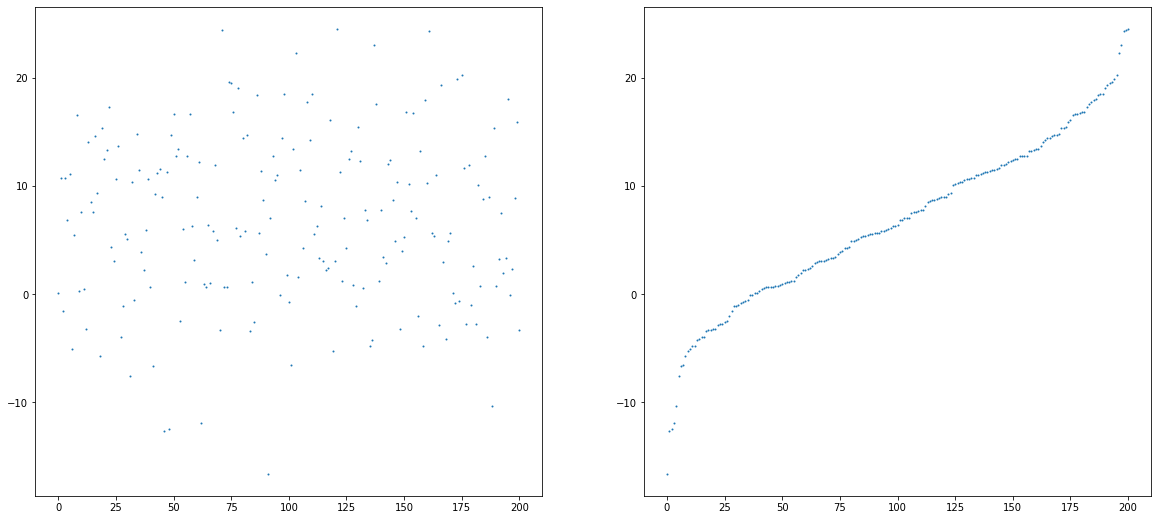

std


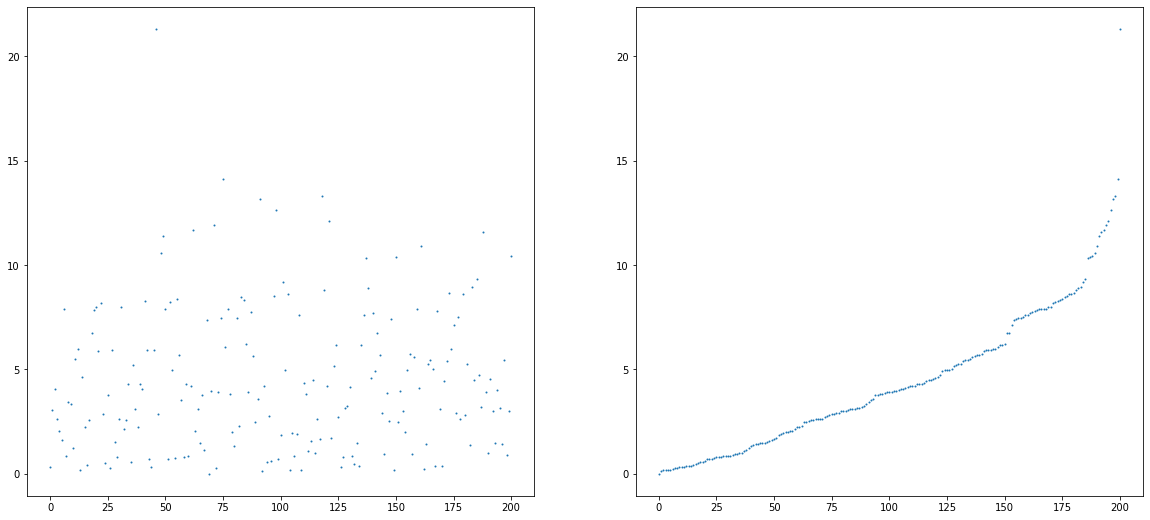

min


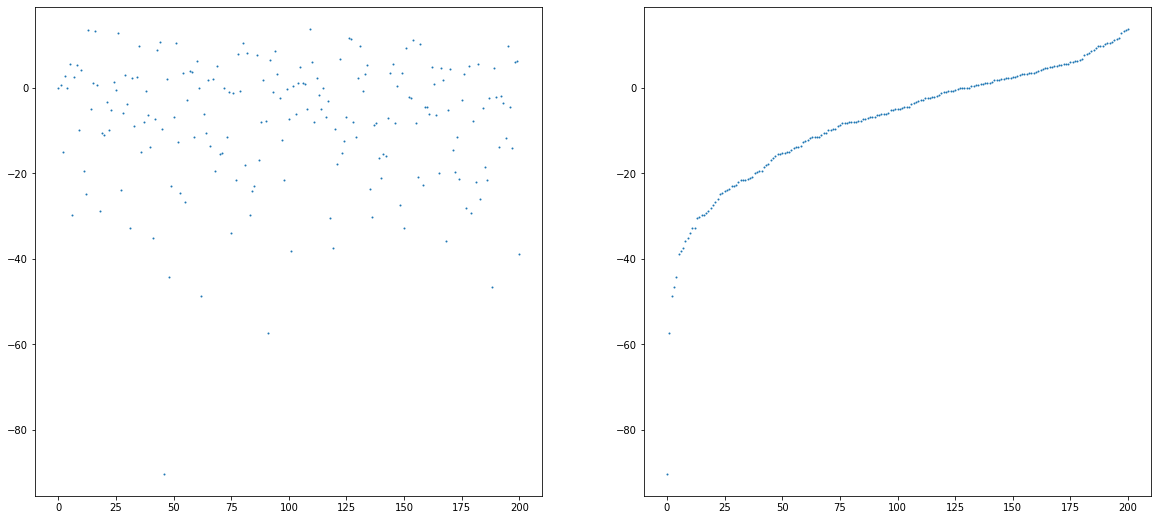

25%


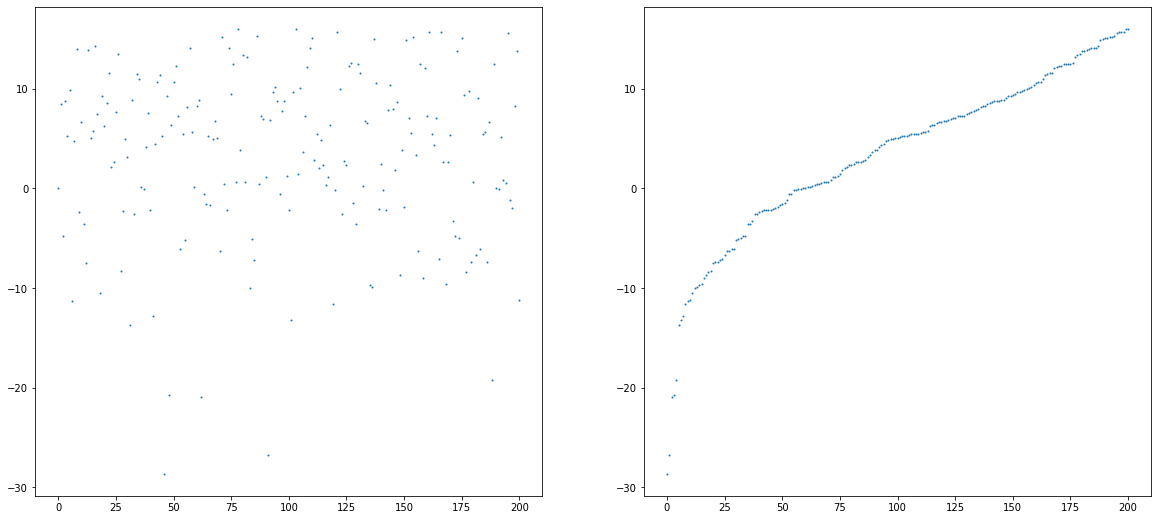

50%


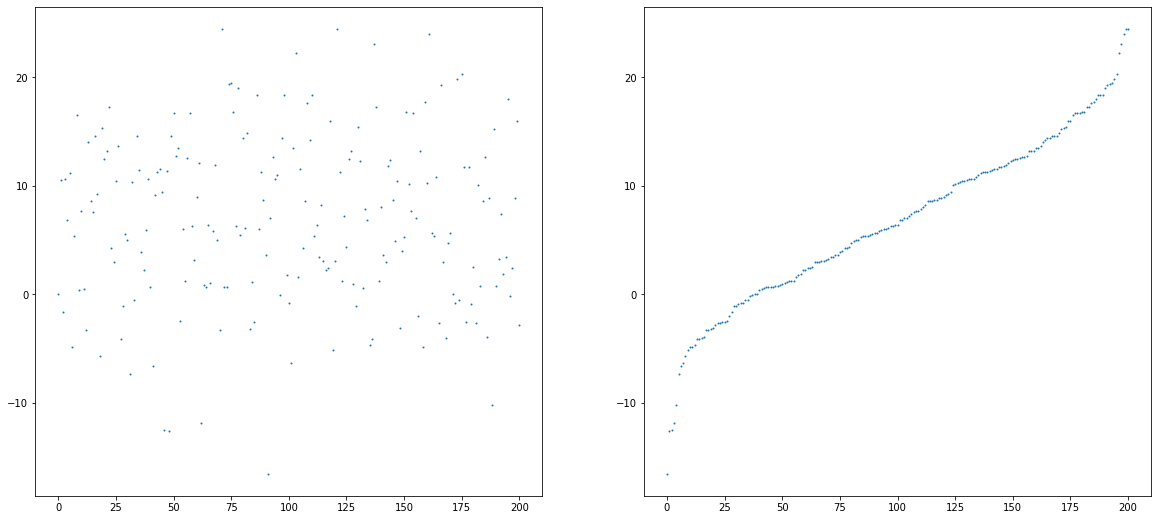

75%


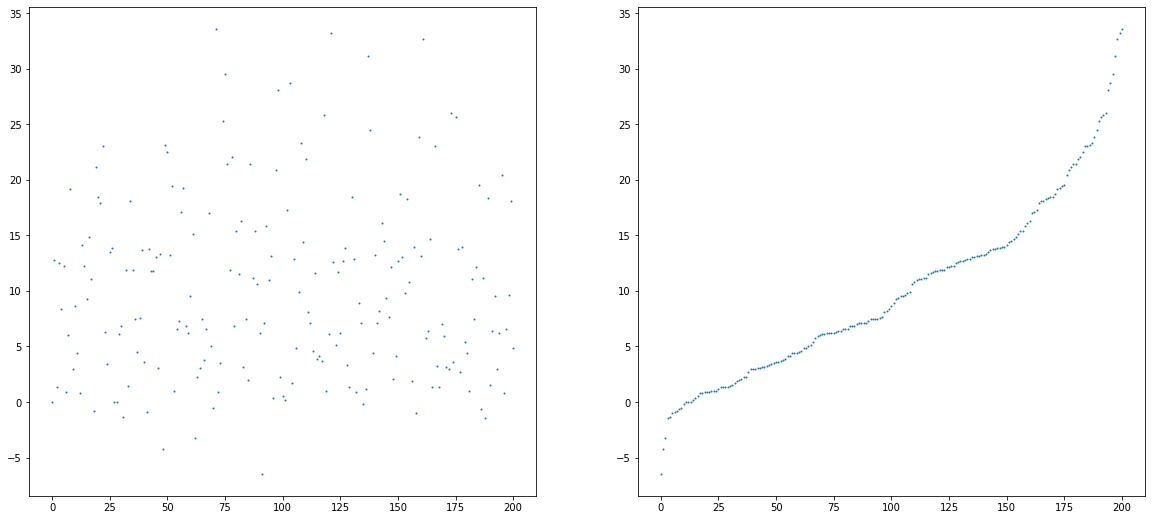

max


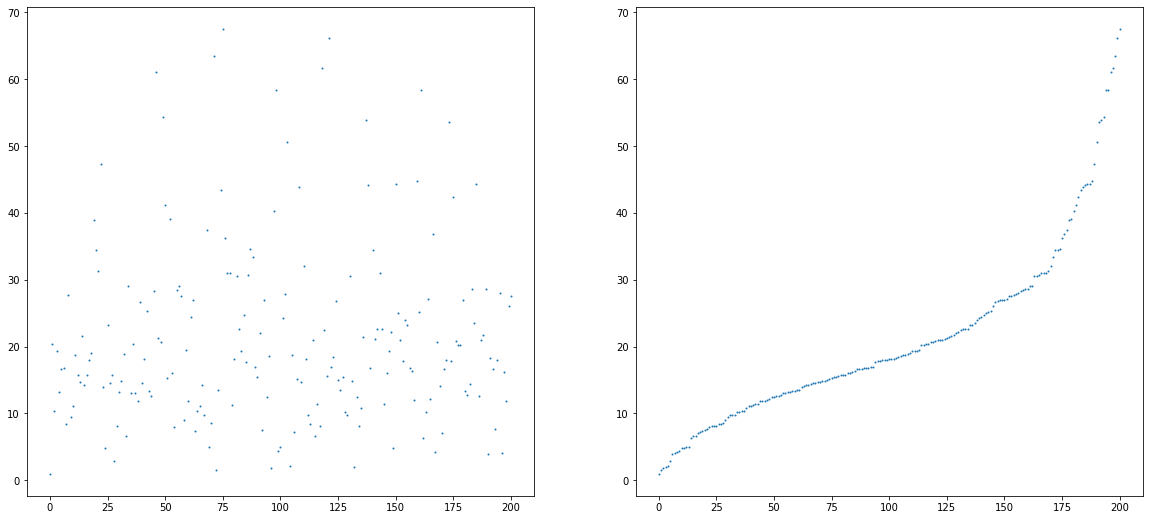

In [10]:
#Usual metrics for all features
description = train_df.describe()
for j in range(1, description.shape[0]):
    plt.figure(1, figsize=(15,5))
    print(description.index.values[j])
    col = description.take([j])
    ax = plt.subplot(121)
    plt.plot([i for i in range(description.shape[1])], description.take([j]).transpose(), 'o', markersize=1)
    ax = plt.subplot(122)
    plt.plot([i for i in range(description.shape[1])], np.sort(description.take([j]).unstack().transpose()), 'o', markersize=1)
    plt.show()

The usual metrics do not seem to show any anormal value, nor any groups of features with close values. Let's see the features in more details :

2


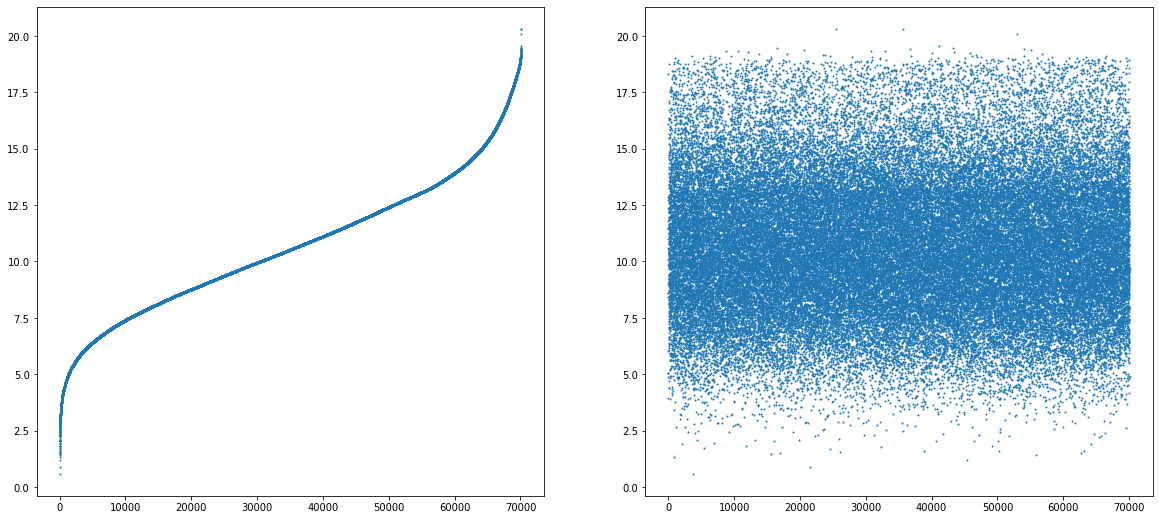

3


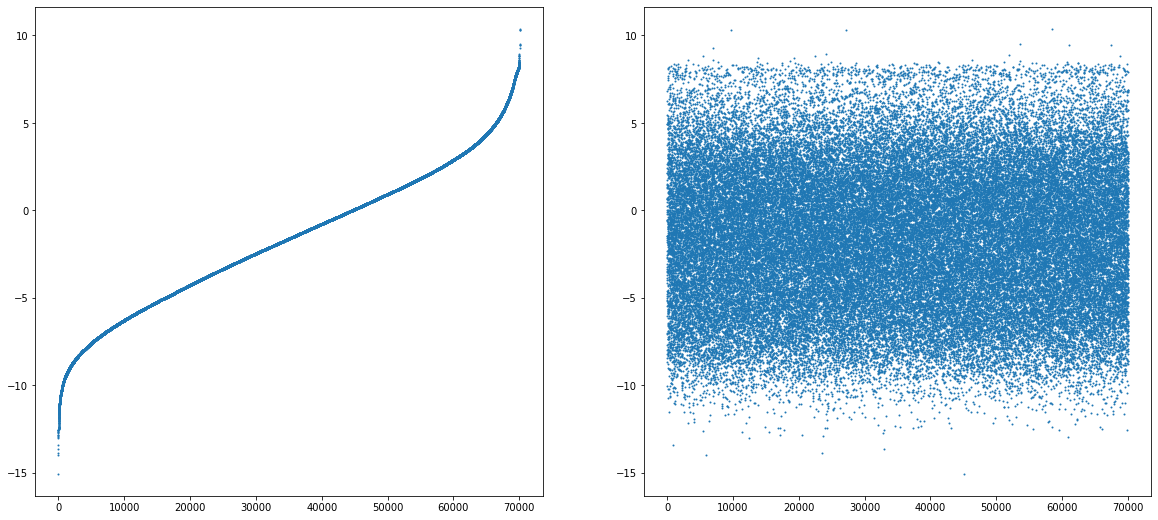

4


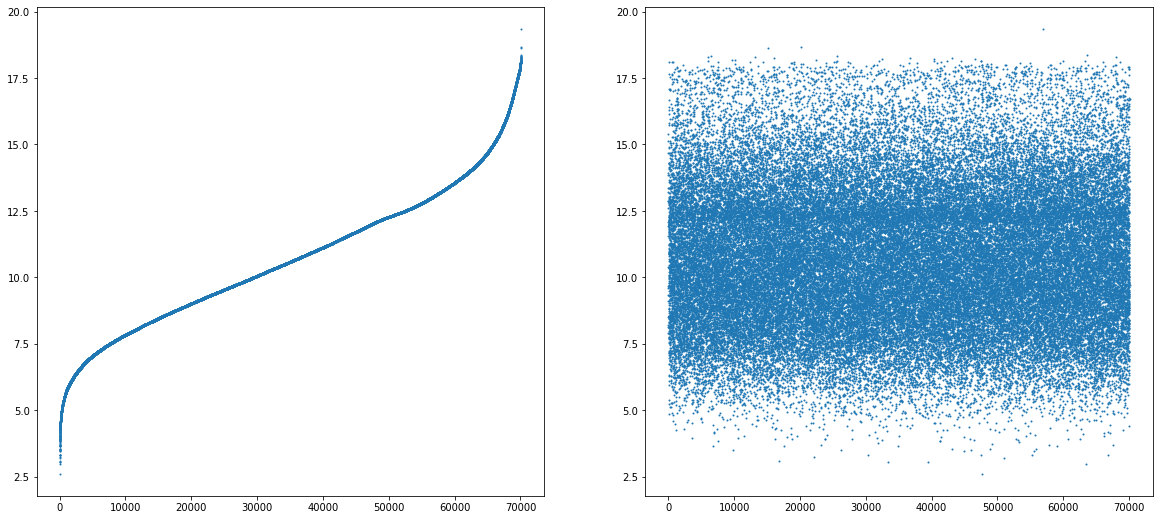

5


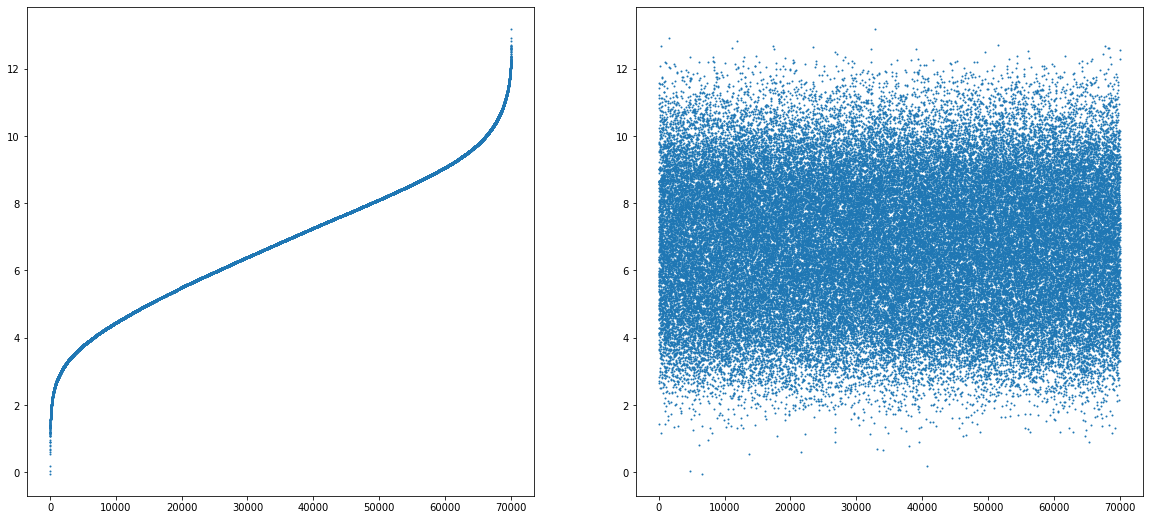

6


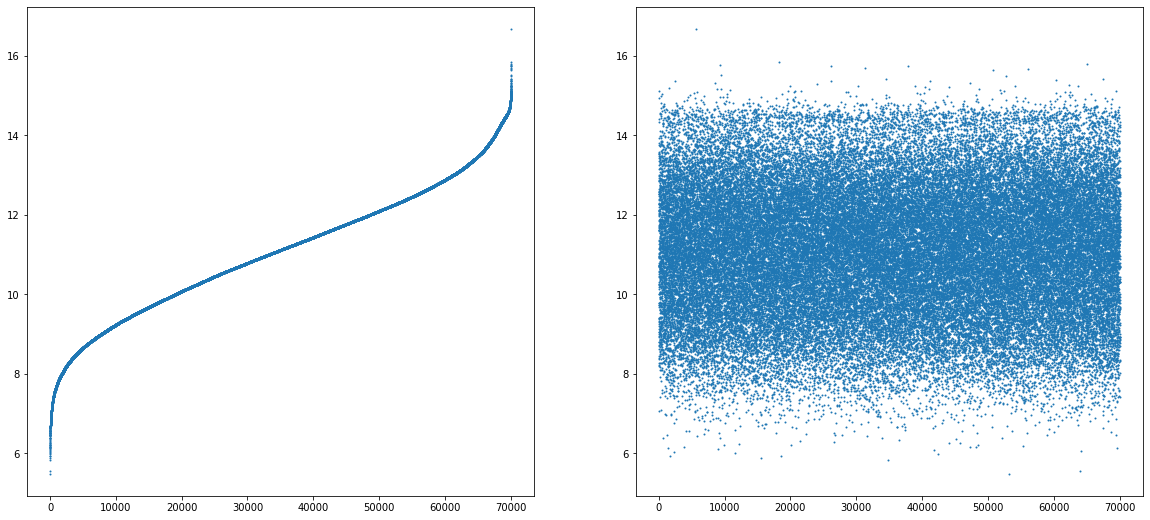

7


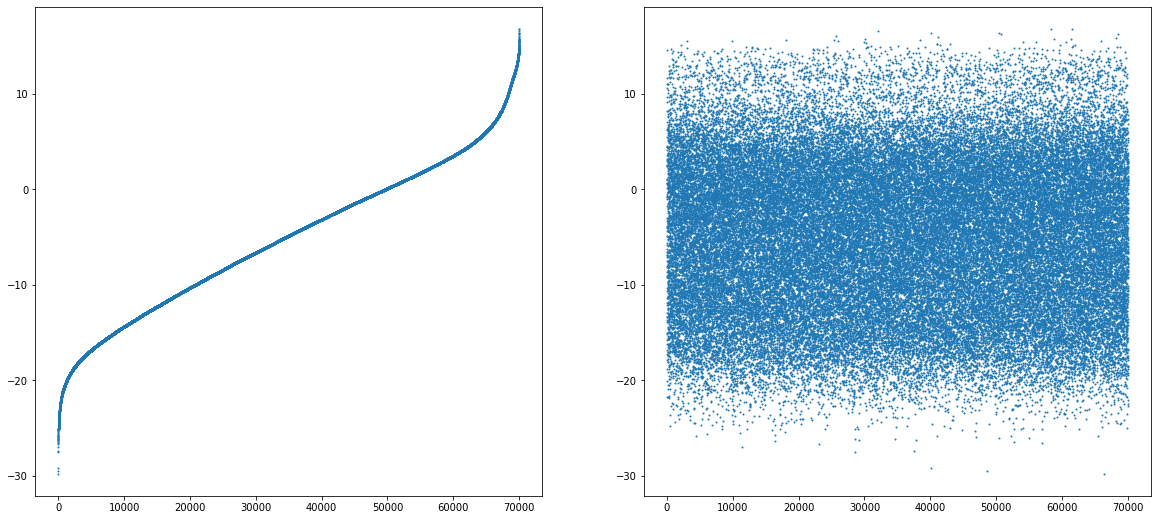

8


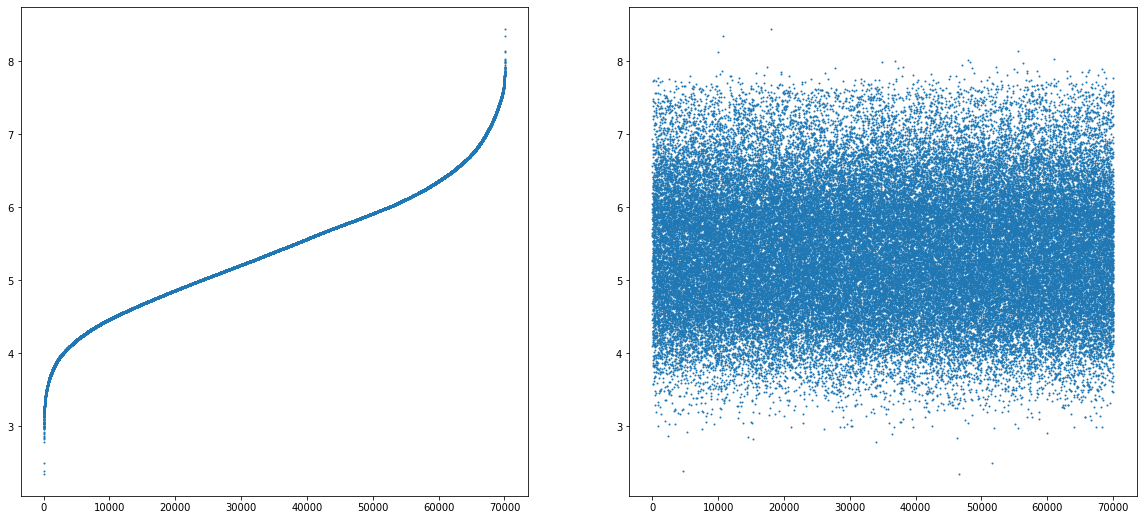

9


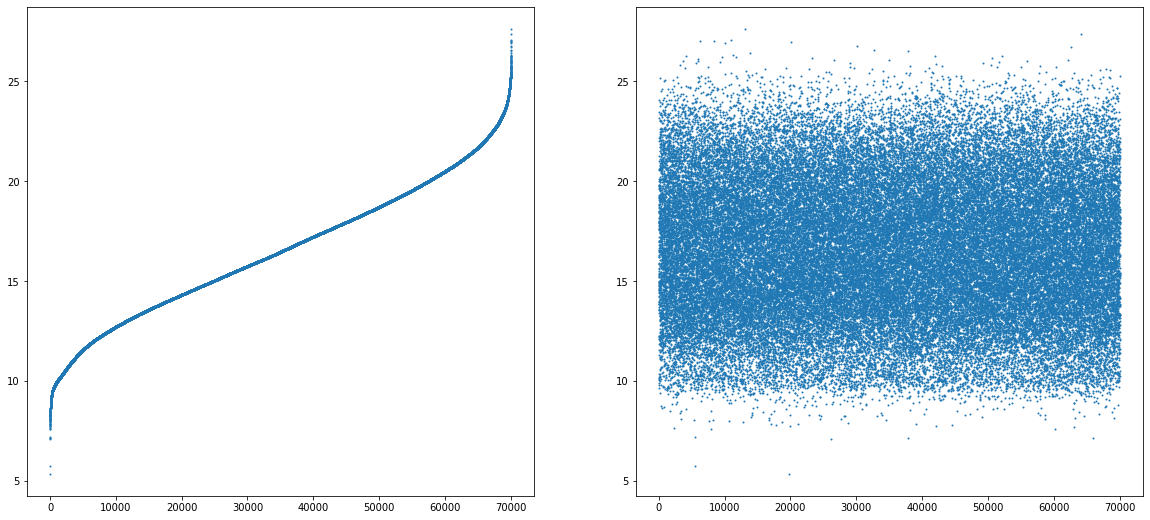

10


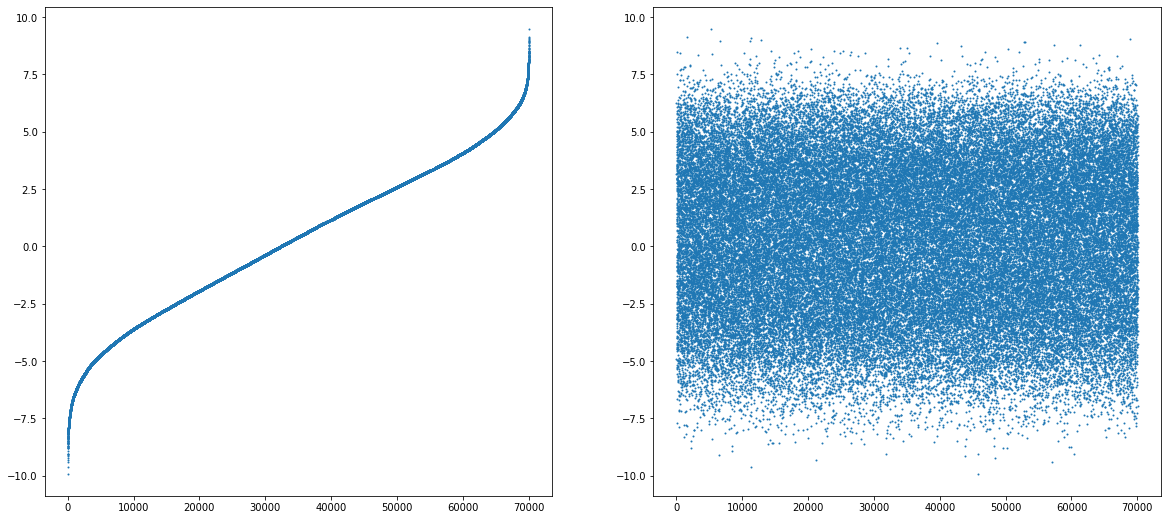

11


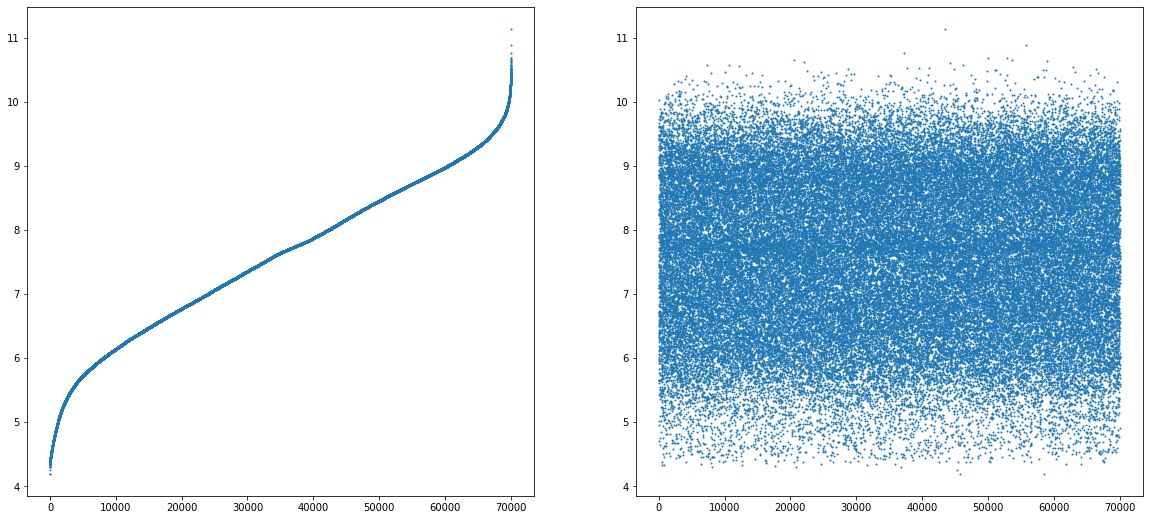

12


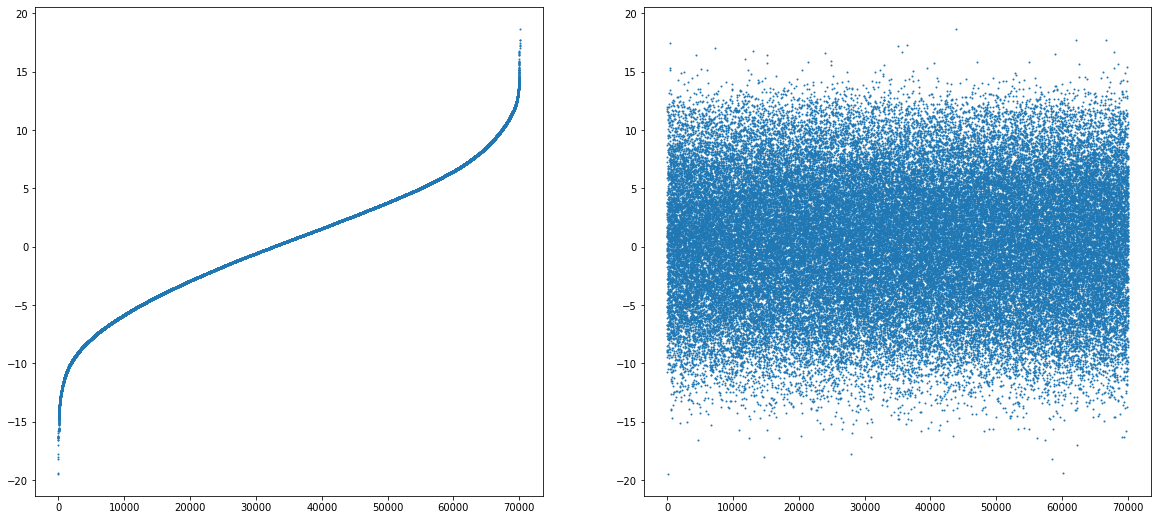

13


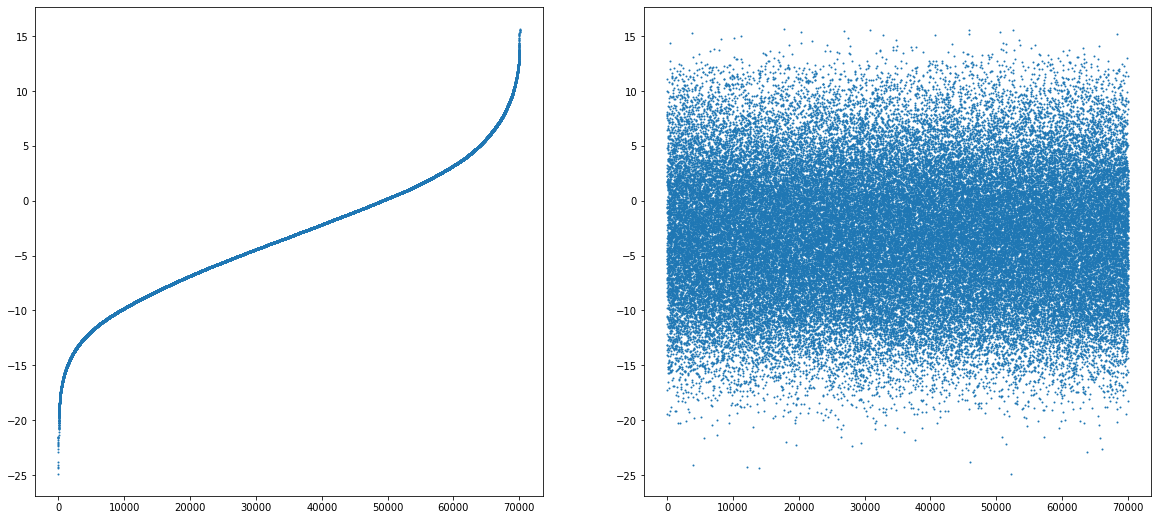

14


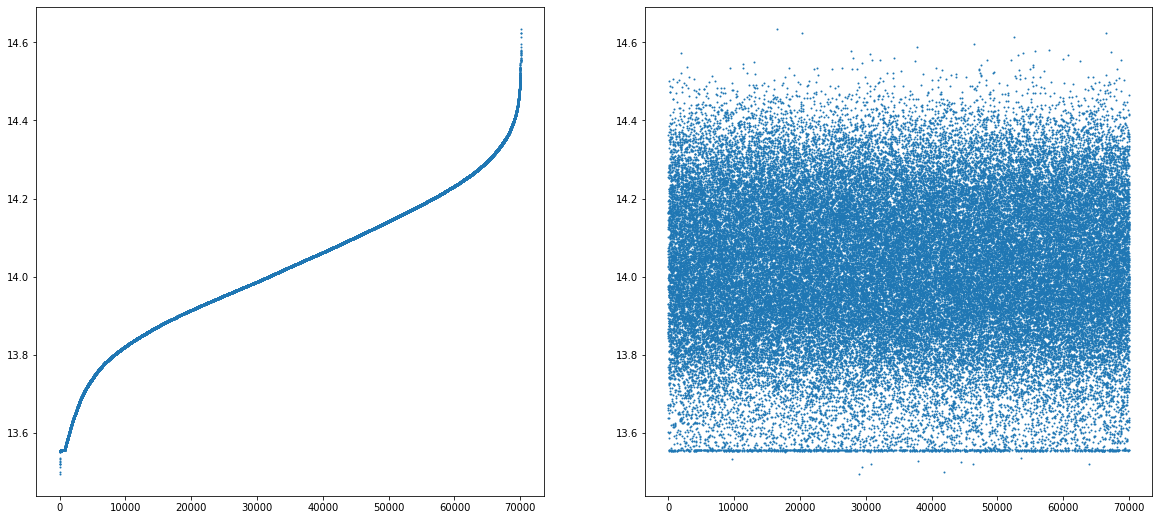

15


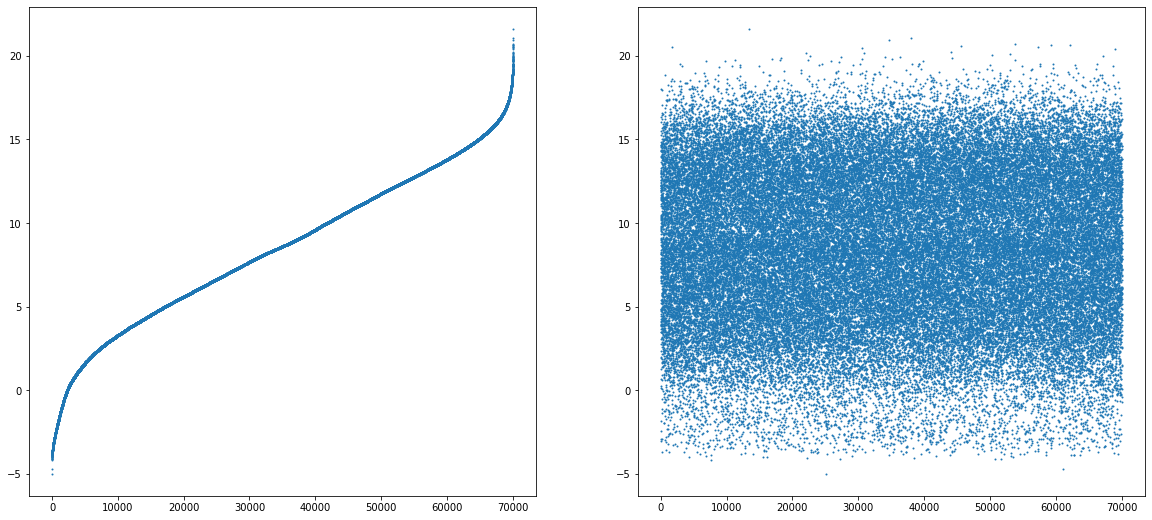

16


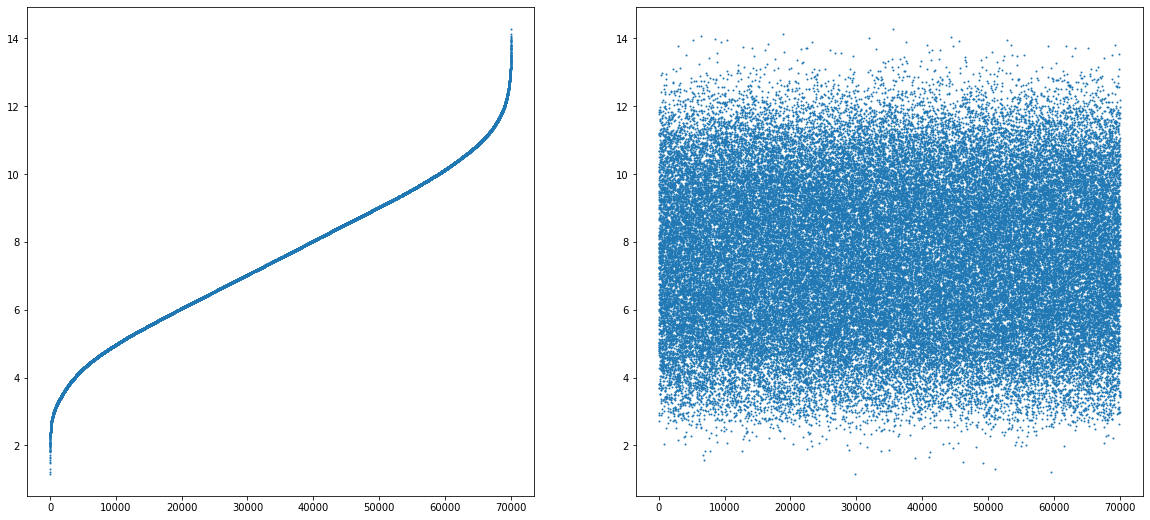

17


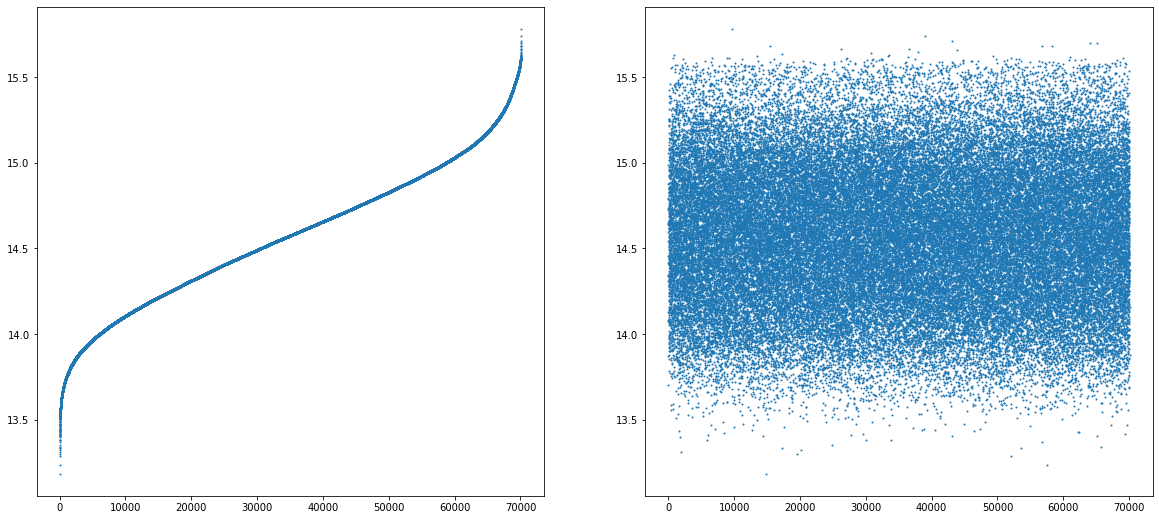

18


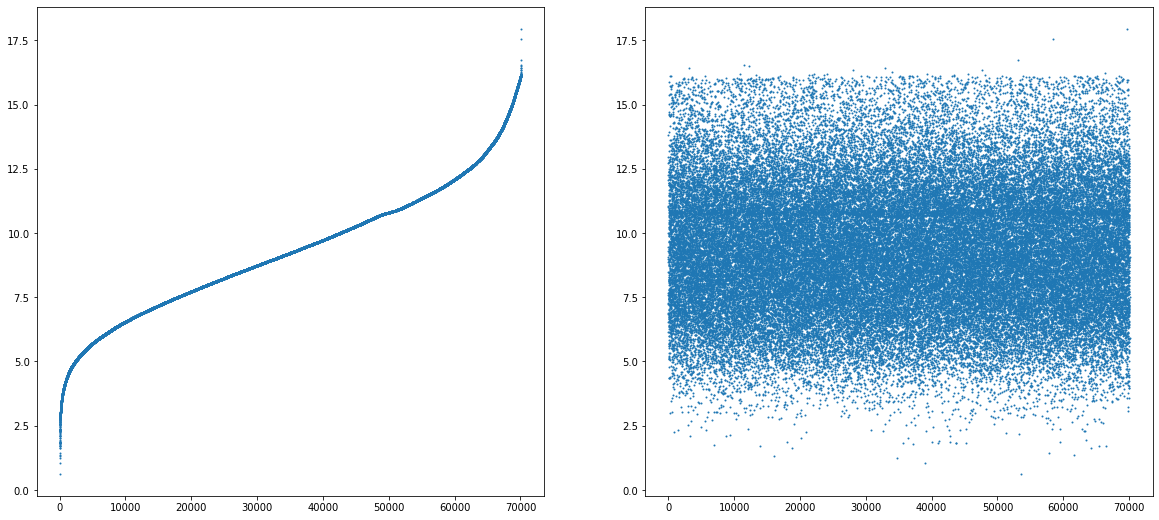

19


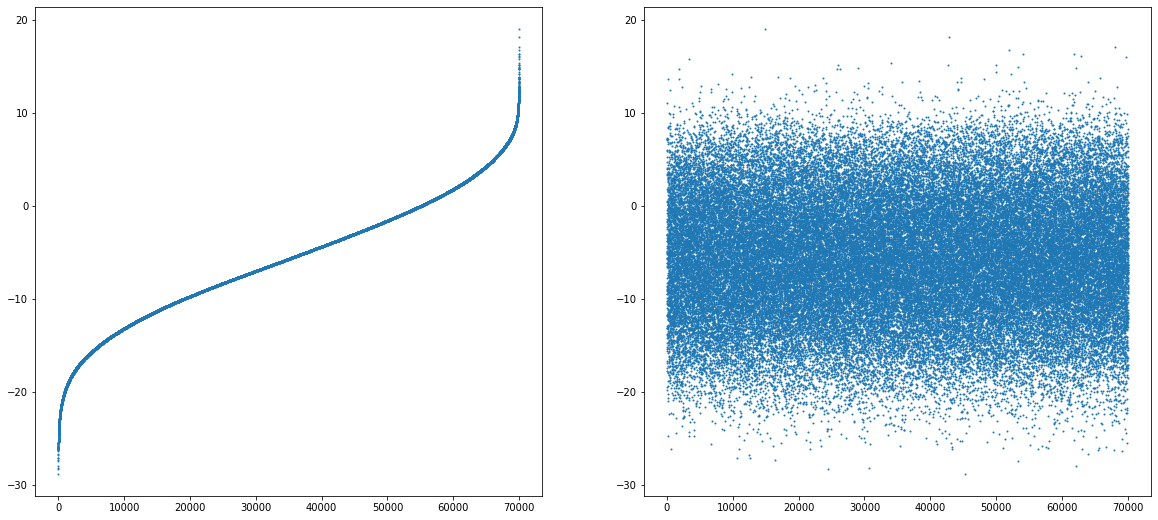

20


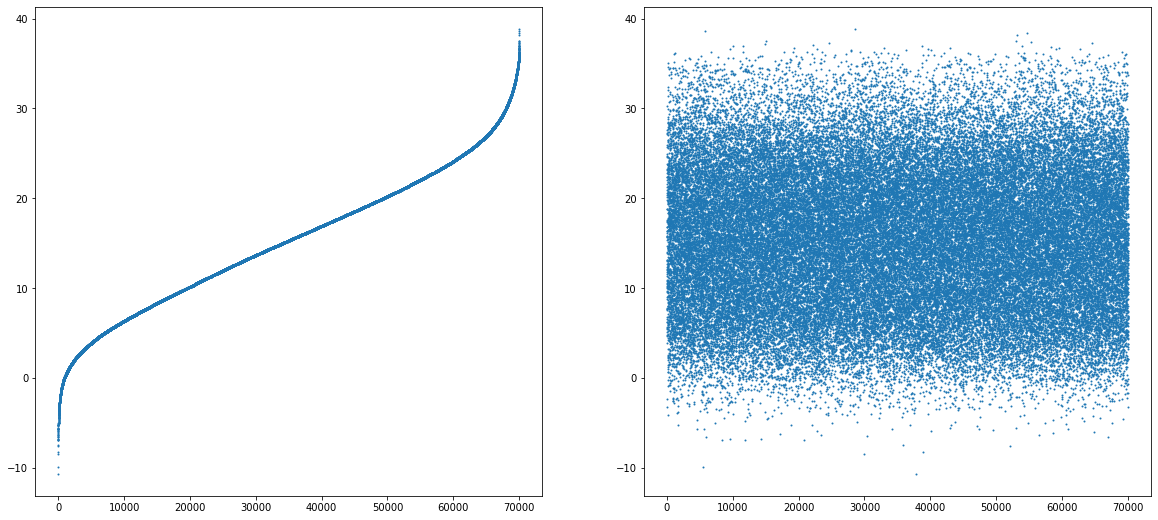

21


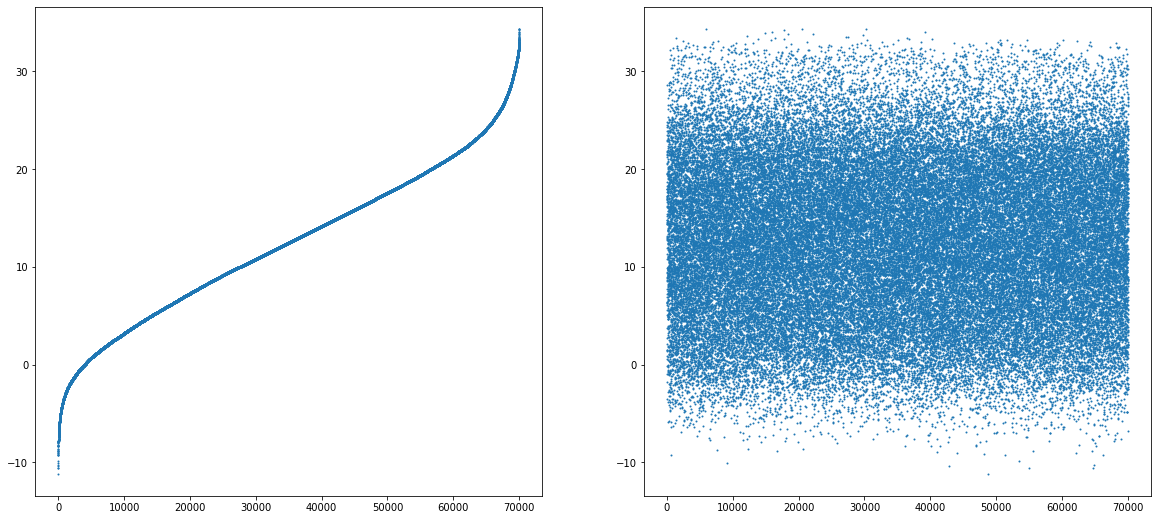

In [4]:
for j in range(2, 22):
    col = train_df.get(j)
    plt.figure(1, figsize=(15,5))
    print(j)
    ax = plt.subplot(121)
    ax.plot([i for i in range(col.size)], col.sort_values(), 'o', markersize=1)
    ax = plt.subplot(122)
    ax.plot([i for i in range(col.size)], col, 'o', markersize=1)
    plt.show()

Plotting each feature (by groups of 20 to not overwhelm my memory), I extracted those who look the most irregular and drawed a precise histogram for each one, with the testing set on top of the training set :

14


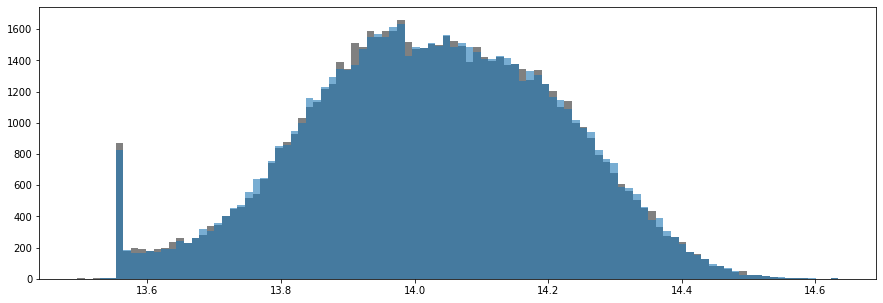

103


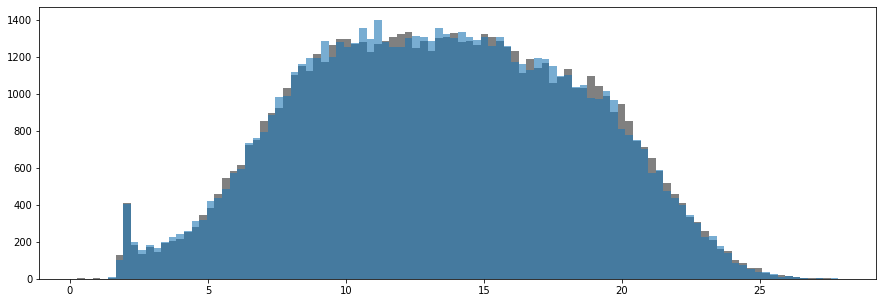

128


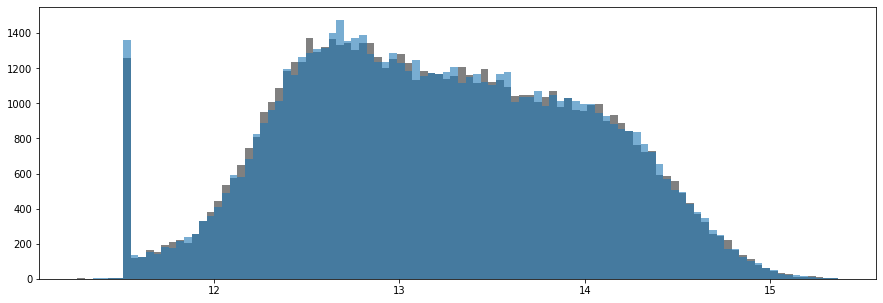

136


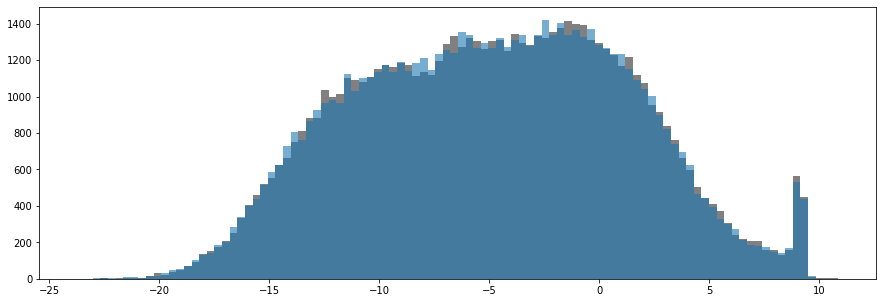

152


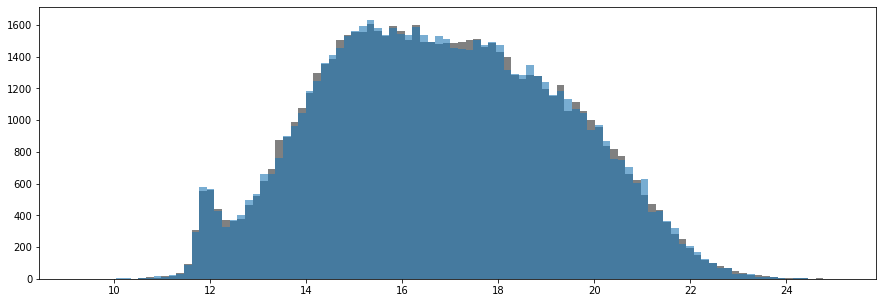

155


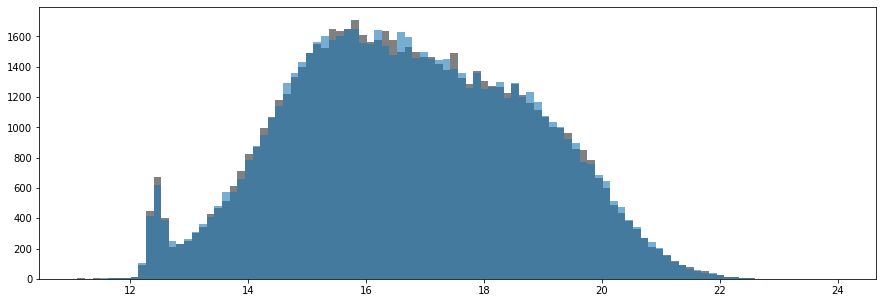

160


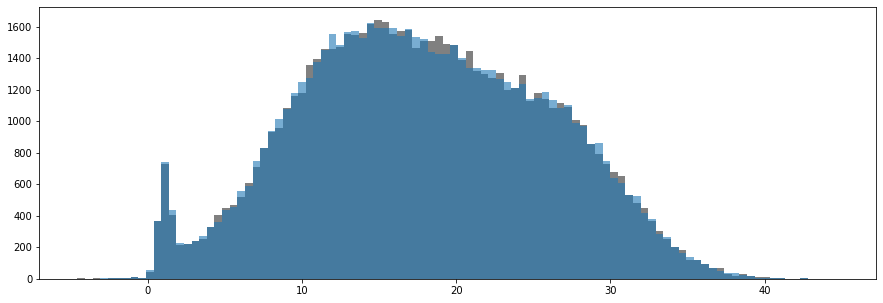

166


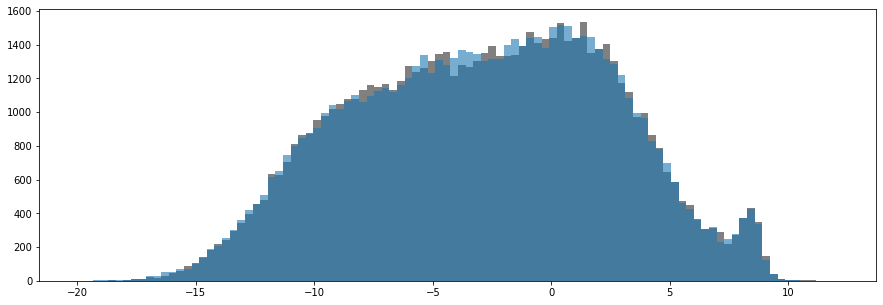

177


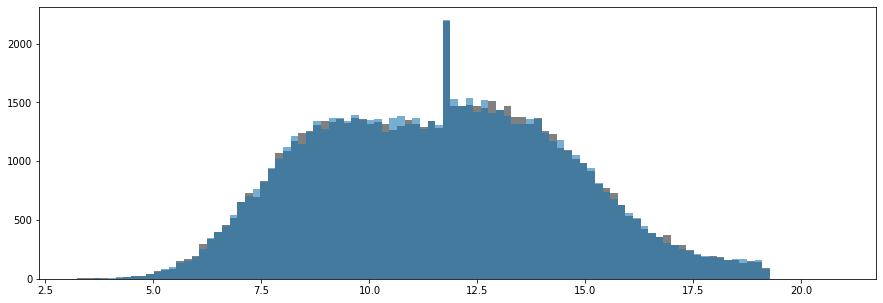

179


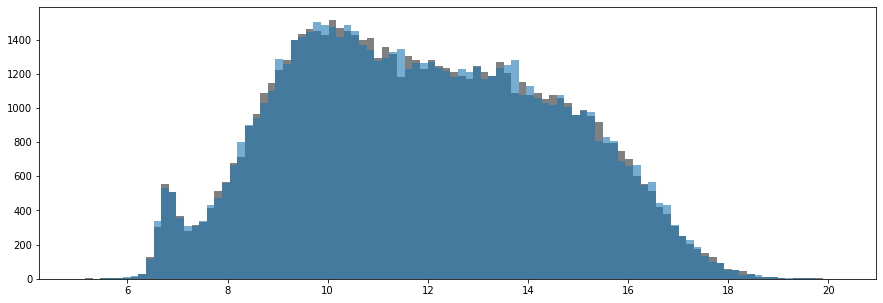

182


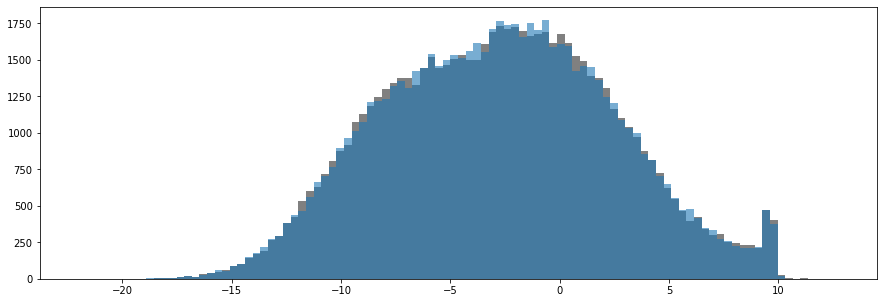

198


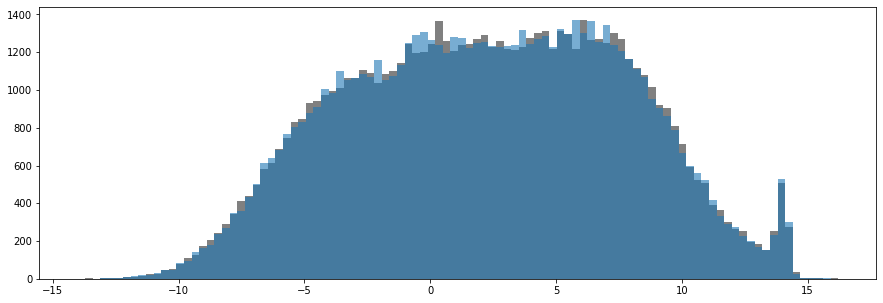

In [33]:
irregulars = [14, 103, 128, 136, 152, 155, 160, 166, 177, 179, 182, 198]
for j in irregulars:
    plt.figure(1, figsize=(15,5))
    print(j)
    col = train_df.iloc[:,j]
    #ax.set_title("")
    #ax = plt.subplot(121)
    n, bins, p = plt.hist(col, color="grey", bins=100)
    
    col = test_df.iloc[:,j-1]
    #ax = plt.subplot(122)
    plt.hist(col, bins=bins, alpha=0.6)
    plt.show()

For both taining and testing set, most of those feature indeed shows irregularities in their histogram but it is not easy to know if this is error values or just the logical effect of the type of data represented by the feature. Either way the irregularities are mostly not that much important considering the total amount of value but we will still try to give a special attention to the irregular feature in the predicition.

## Feature relations
We know try to find simple relations between features and with the objective.

In [31]:
correlations = train_df[[i for i in range(1,202)]].corr()

### Correlation with the objective

In [94]:
corrtogoal = correlations.iloc[0, 1:201]
#print(corrtogoal)
print("10 most correlated features (with the objective label) :")
print(corrtogoal.abs().sort_values(ascending=False).head(10))

10 most correlated features (with the objective label) :
83     0.080997
141    0.070490
55     0.068790
14     0.066019
112    0.065921
8      0.064283
148    0.064117
28     0.063510
176    0.061070
24     0.060991
Name: 1, dtype: float64


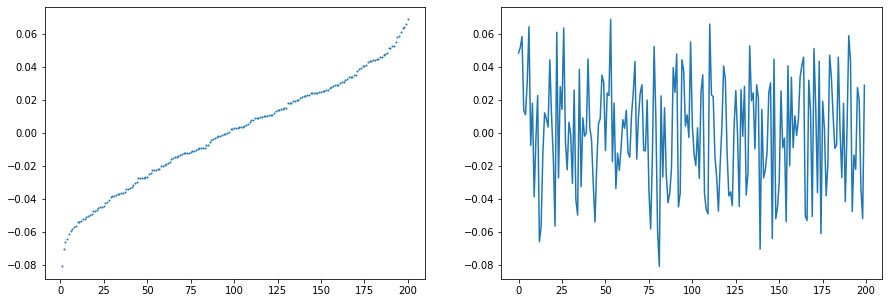

In [100]:
plt.figure(1, figsize=(15,5))
sorttogoal = corrtogoal.sort_values()
ax = plt.subplot(121)
ax.plot([i for i in range(1,201)], sorttogoal, 'o', markersize=1)
ax = plt.subplot(122)
ax.plot([i for i in range(corrtogoal.size)], corrtogoal)
plt.show()

No feature looks like it has a real linear correlation with the objective, and the correlation is generally more or less random across the dataset.

### Correlation between features

In [93]:
sortcor = correlations.iloc[1:201,1:201].abs().unstack().sort_values(kind="quicksort").reset_index()
sortcor = sortcor[sortcor['level_0'] < sortcor['level_1']]
print("\n The most correlated features are shown below:")
print(sortcor.tail(10))
print("\n The least correlated features are shown below:")
print(sortcor.head(10))


 The most correlated features are shown below:
       level_0  level_1         0
39781      112      185  0.013836
39782       69      171  0.013902
39784       51      138  0.014012
39786      128      140  0.014128
39788      120      165  0.014302
39791       51       99  0.014378
39792       36      136  0.014548
39795       91      151  0.014604
39796       36      148  0.014604
39798        4       17  0.014829

 The least correlated features are shown below:
    level_0  level_1             0
0        33       70  4.370327e-07
3        17       74  1.151774e-06
5       133      154  1.162002e-06
6        10       86  1.807790e-06
9        58       87  2.051344e-06
10       54      141  2.474324e-06
13      177      181  2.877344e-06
15       43       93  3.315843e-06
16       50      163  3.426349e-06
19        3      134  3.671988e-06


<Figure size 1152x1152 with 0 Axes>

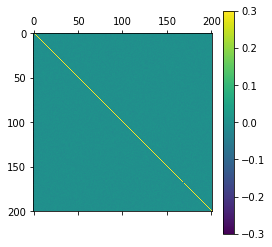

In [102]:
plt.figure(1, figsize=(16,16))
plt.matshow(correlations, vmin=-0.3, vmax=0.3)
plt.colorbar()
plt.show()

According to the standard of the literature, none of the features seem correlated.
#### No correlation have been highlighted

### Conclusion of EDA

The data set contains more negative samples than positive ones, we will need to address this. The features are not correlated and there seems to be few outliers. Some features also seems to have irregularities in their histogram, what may be exploitable if we find a way too.


# Data preprocessing